# importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from overview import load_bank_variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.expand_frame_repr', False)  # Disable line wrapping
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Adjust column width


## Loading Data 

In [2]:
bank_df = pd.read_csv("bank.csv")
df = bank_df.copy()   

## variables

In [3]:
load_bank_variables()

,Variable Name,Description
0,age,Age
1,job,"Type of job (e.g., 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"Marital status (e.g., 'divorced','married','single','unknown'; 'divorced' means divorced or widowed)"
3,education,"Education level (e.g., 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,Has credit in default?
5,balance,Average yearly balance (euros)
6,housing,Has housing loan?
7,loan,Has personal loan?
8,contact,"Contact communication type (e.g., 'cellular','telephone')"
9,day_of_week,Last contact day of the week


## Data Exploration

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


the dataset countains 2000 rows and 17 columns both numerical and categorical  

    - numerical : age , balance , duration , compaign , pdays , previous 
    - categorical: job , marital , education , default , housing , loan , contact , month , poutcome , subscribed 


there is some missing values in : 

    - age (12)
    - job (10)
    - education (104)
    - contact (191)
    - poutcome (454)


<Axes: >

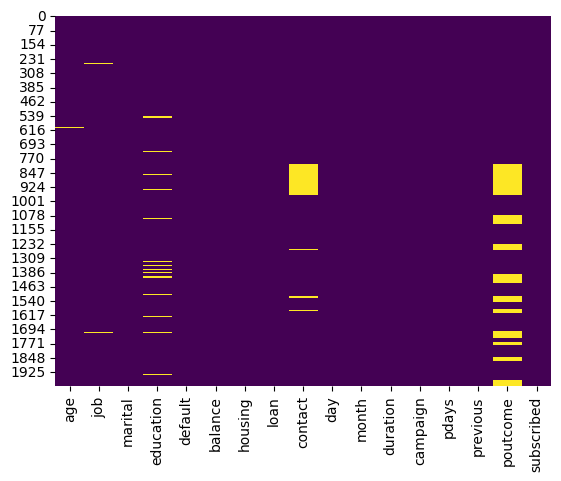

In [7]:
# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## seperate columns by type to plot each

In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

## stats of numerical column 

In [9]:
df[numerical_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


## plotting numerical columns

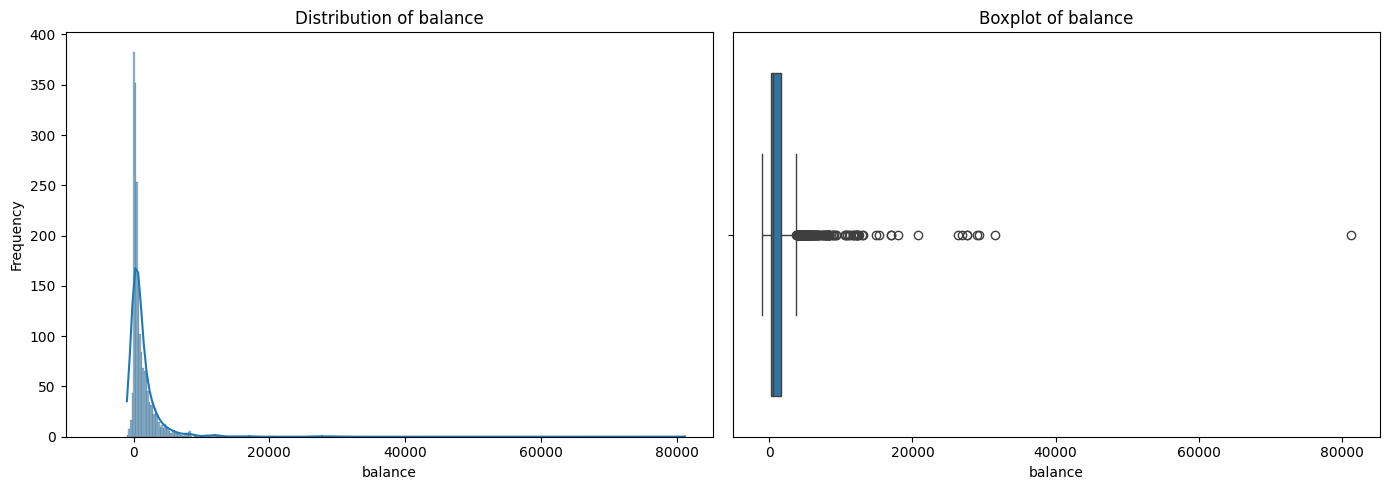

In [10]:
 # Distribution Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['balance'], kde=True, ax=axes[0])
axes[0].set_title(f"Distribution of balance")
axes[0].set_xlabel("balance")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(left=-10000)

  # Boxplot
sns.boxplot(x=df["balance"], ax=axes[1])
axes[1].set_title(f"Boxplot of balance")

plt.tight_layout()
plt.show()

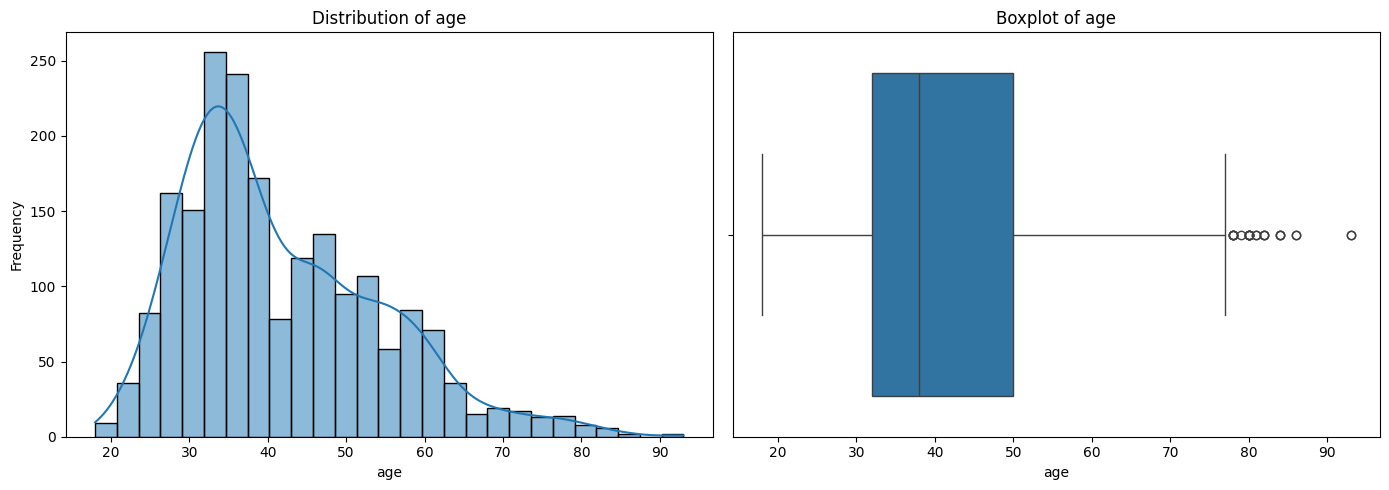

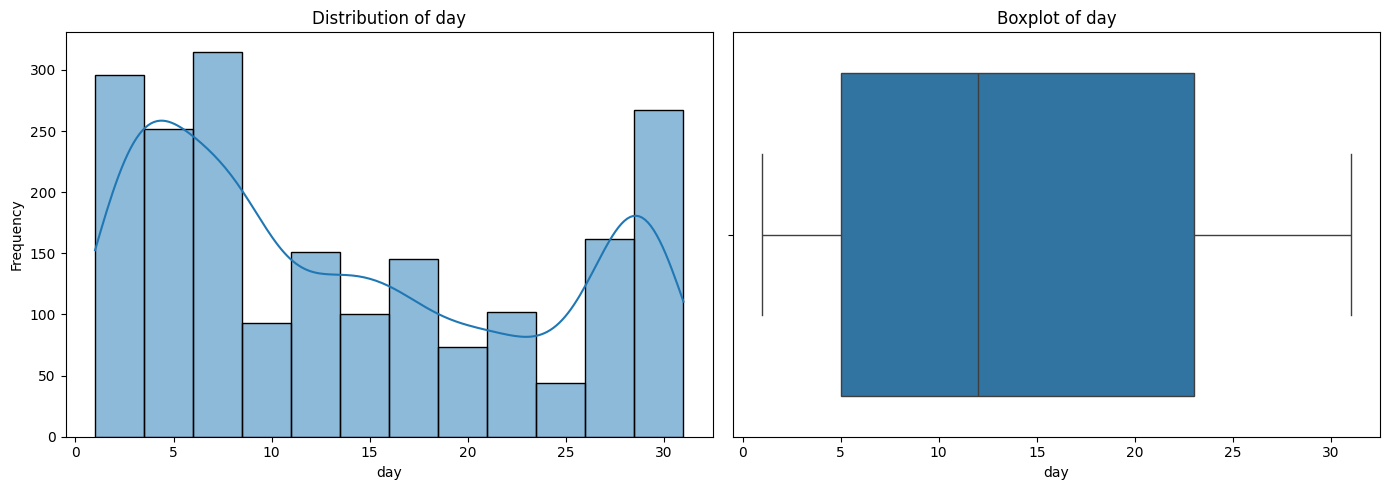

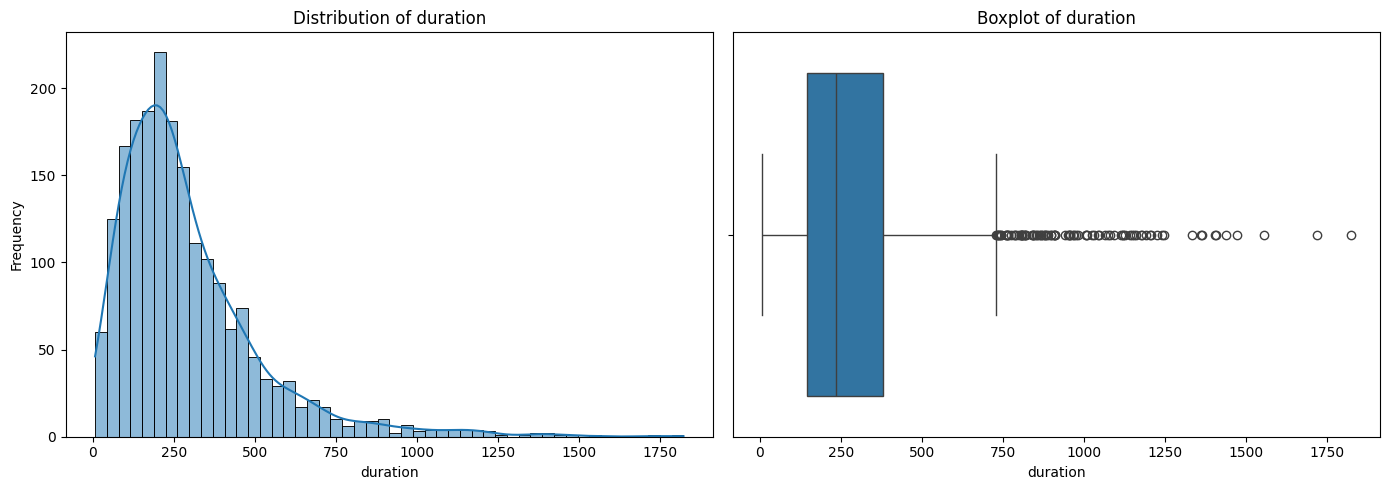

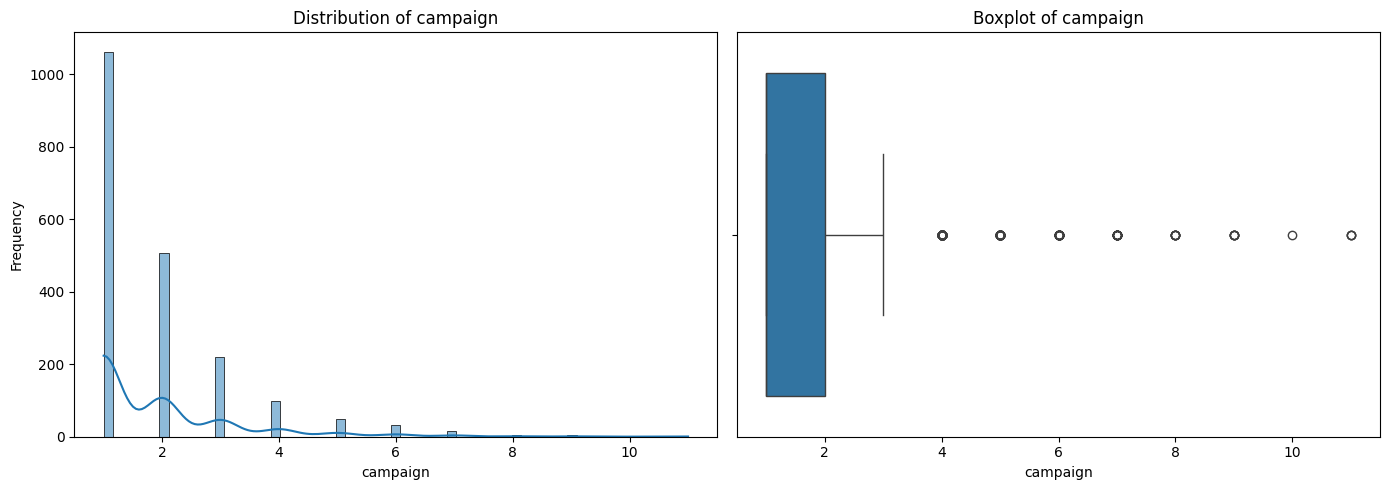

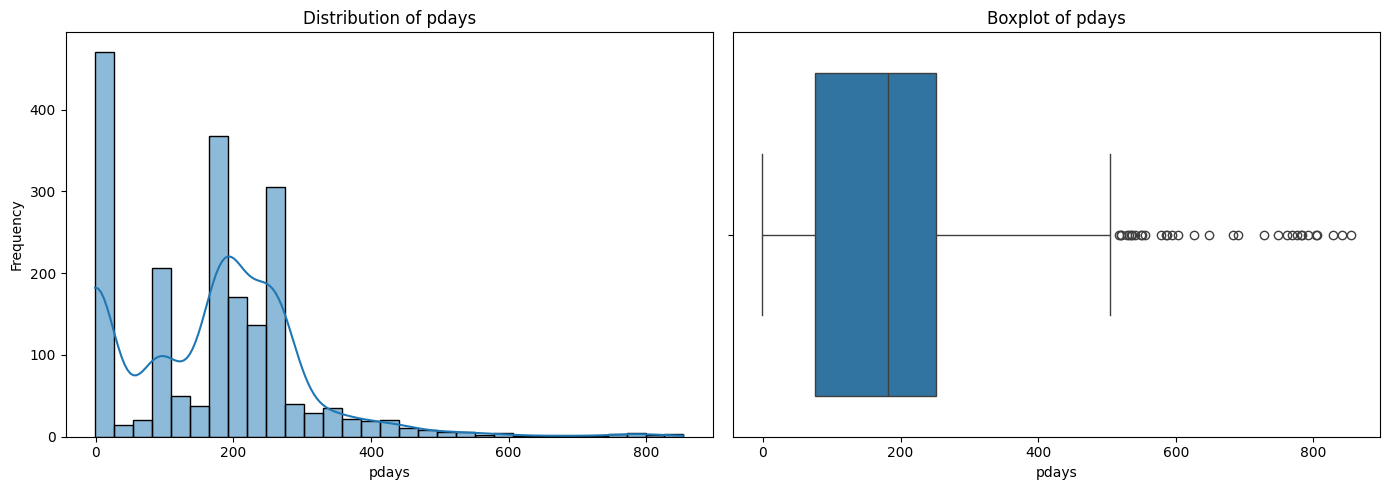

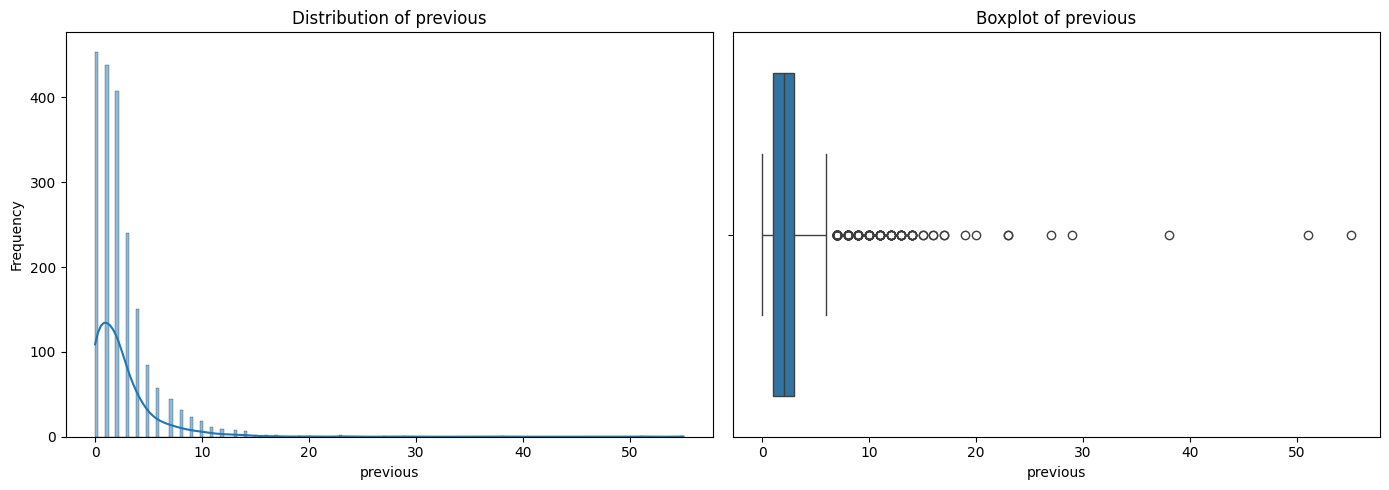

In [11]:
for column in numerical_columns:
    if column != 'balance':  # Skip the 'balance' column
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Distribution Plot
        sns.histplot(df[column].dropna(), kde=True, ax=axes[0])
        axes[0].set_title(f"Distribution of {column}")
        axes[0].set_xlabel(column)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        sns.boxplot(x=df[column], ax=axes[1])
        axes[1].set_title(f"Boxplot of {column}")

        plt.tight_layout()
        plt.show()


## unique values of categorical variables 

In [12]:
for column in df[categorical_columns]:
    print(f"{column} :")
    print(df[column].unique(), "\n")

job :
['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan] 

marital :
['single' 'divorced' 'married'] 

education :
['tertiary' 'secondary' nan 'primary'] 

default :
['no' 'yes'] 

housing :
['yes' 'no'] 

loan :
['no' 'yes'] 

contact :
['cellular' 'telephone' nan] 

month :
['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep'] 

poutcome :
['failure' 'other' 'success' nan] 

subscribed :
['no' 'yes'] 



`nan (missing value)`  exists on these features:
* Job
* Education
* Contact
* Poutcome 


In [13]:
df[categorical_columns].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


## plotting categorical columns

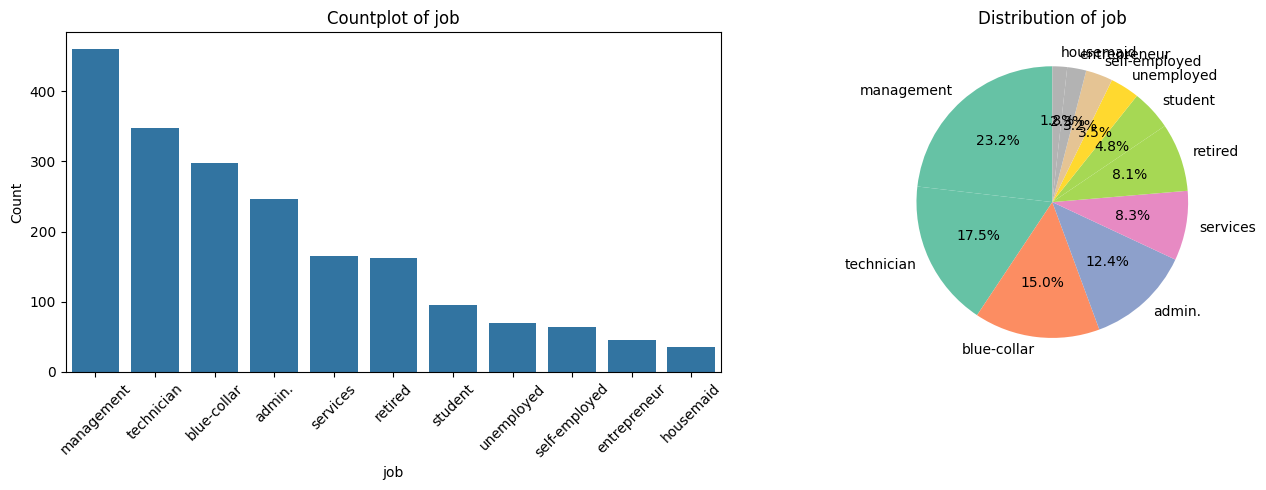

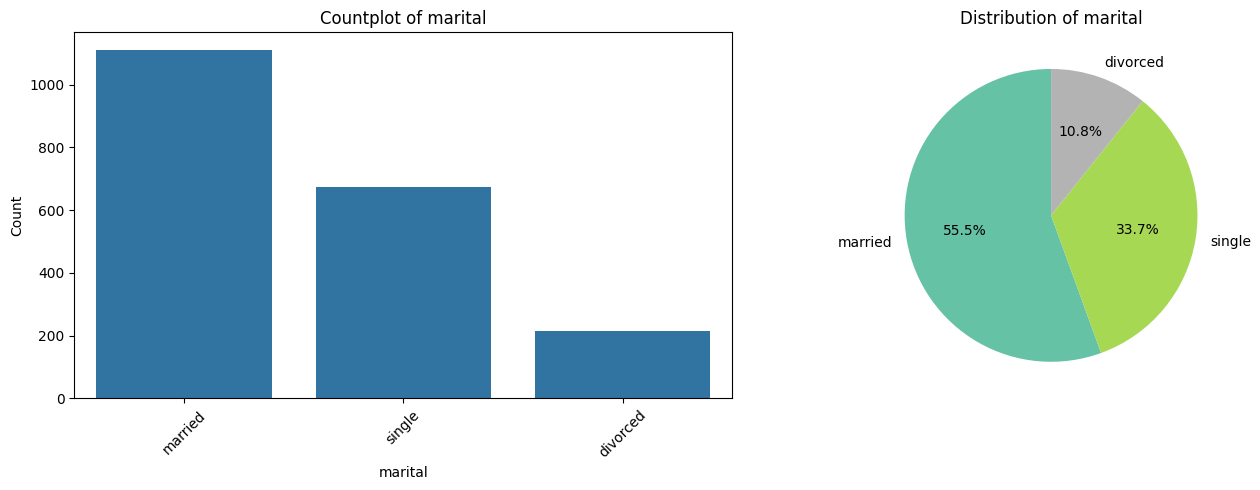

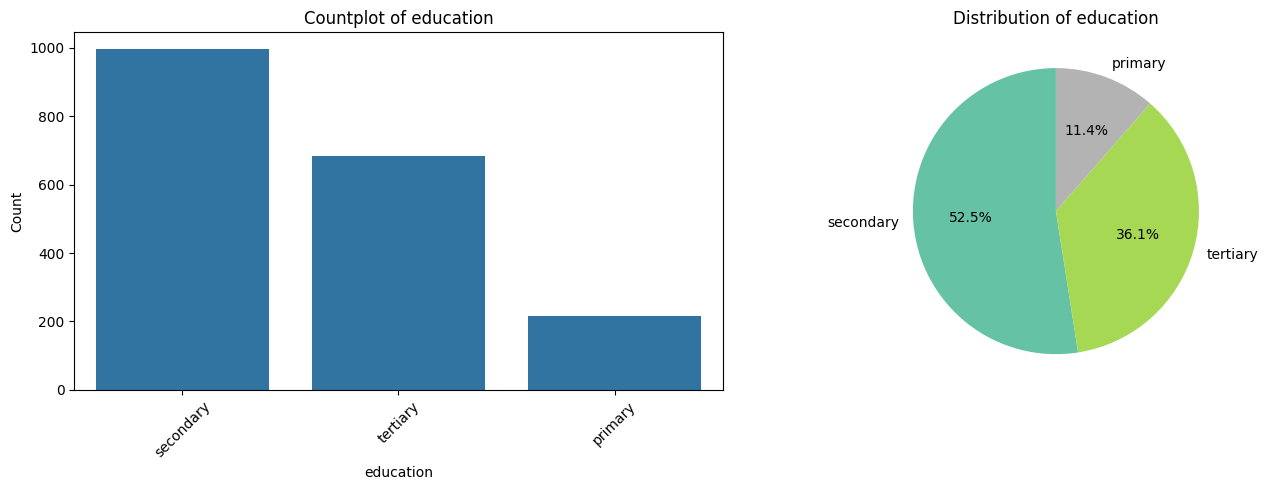

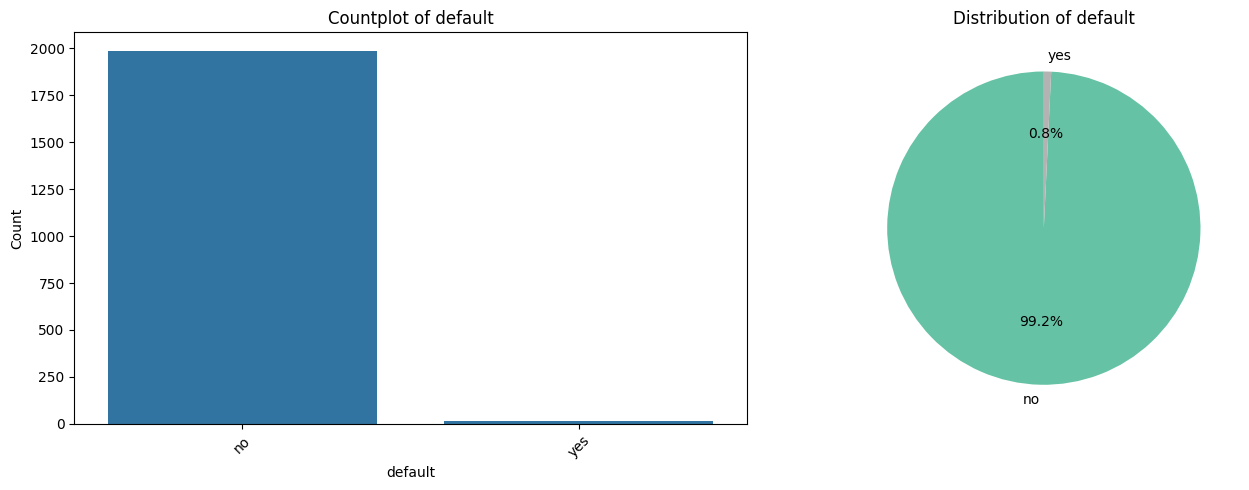

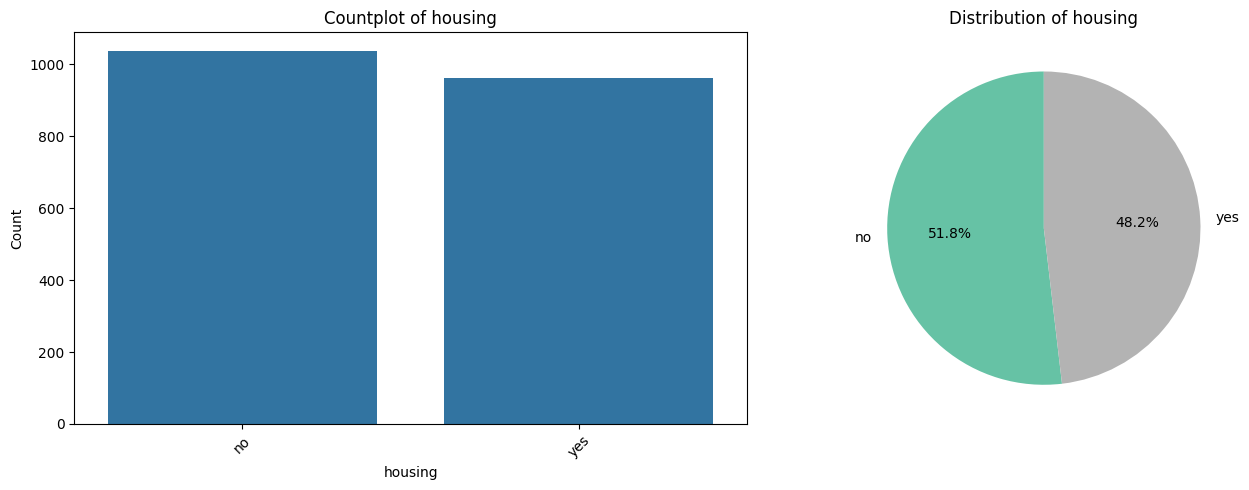

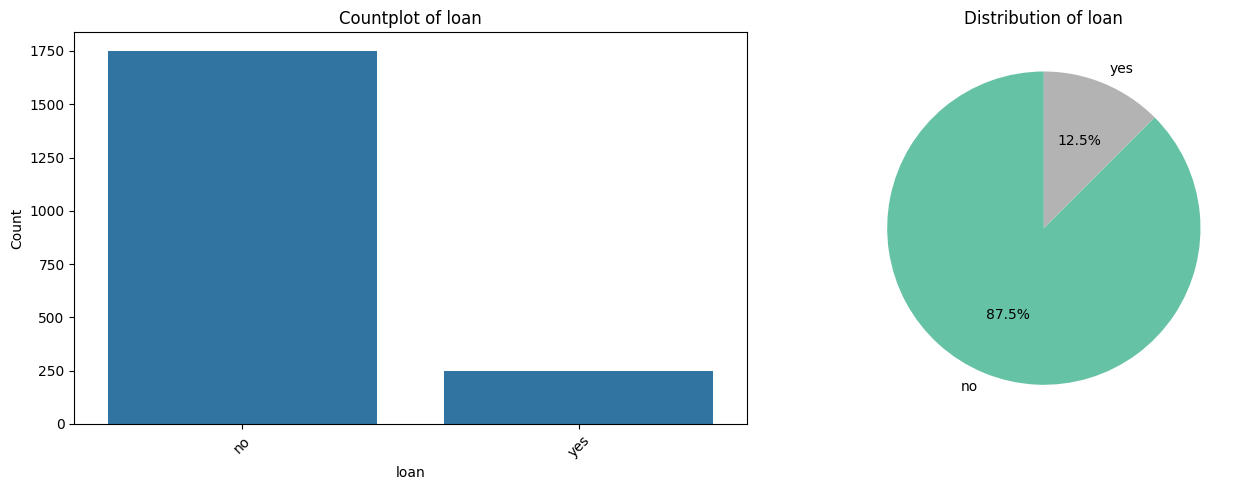

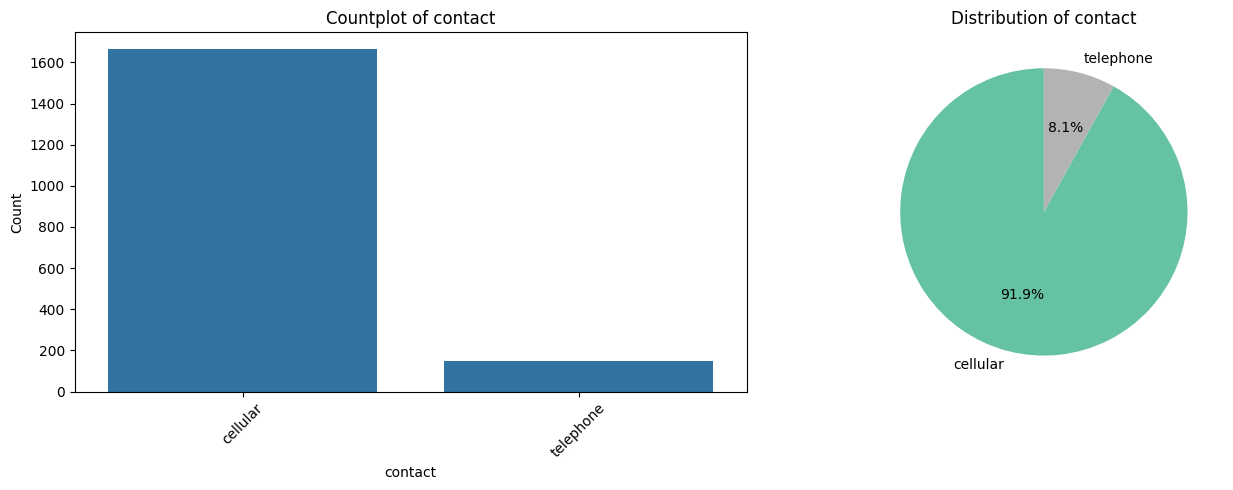

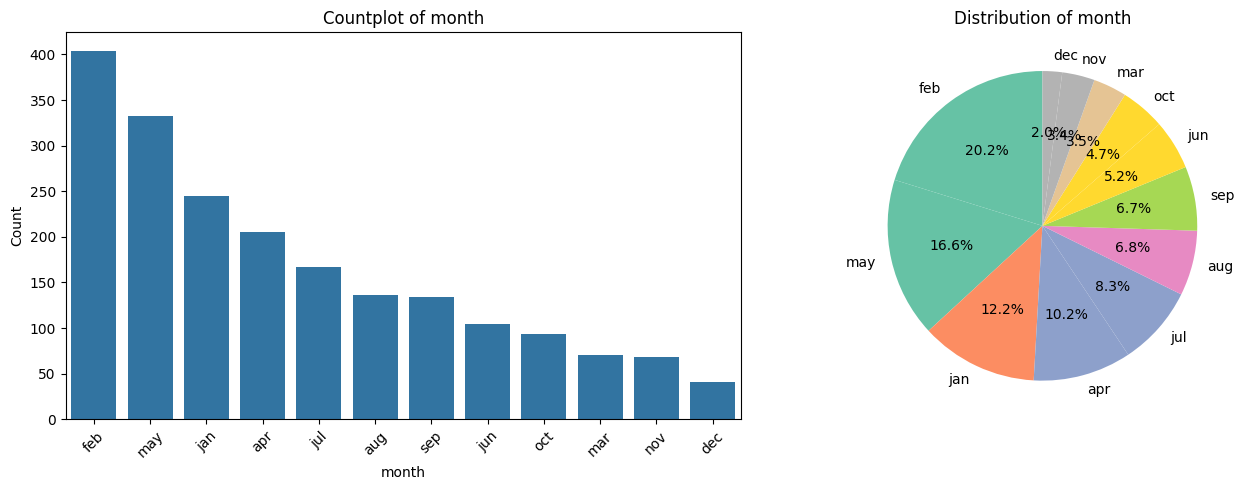

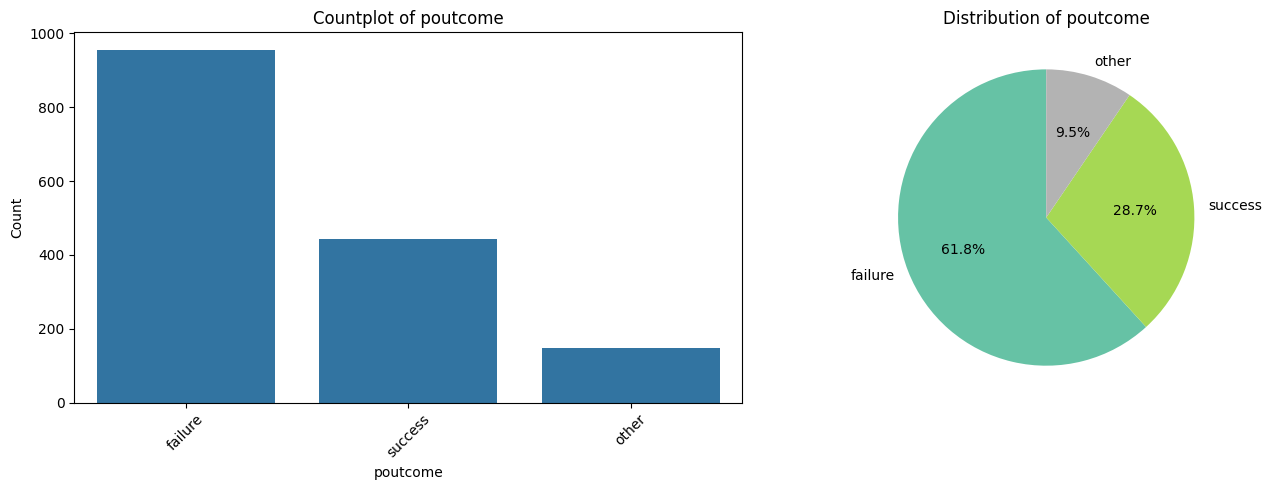

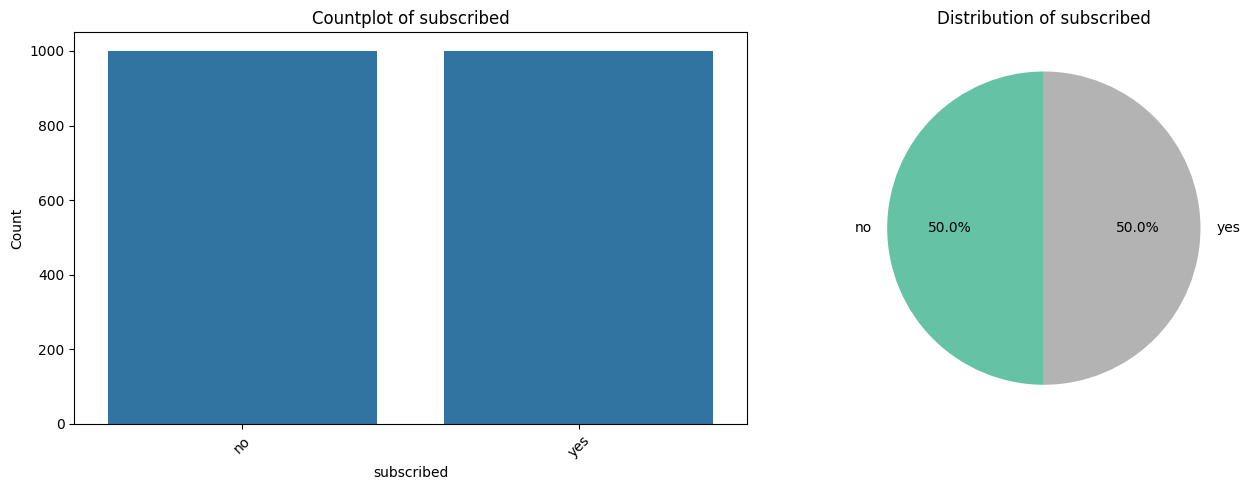

In [14]:
for column in categorical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

    # Countplot
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[0])
    axes[0].set_title(f"Countplot of {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], startangle=90, cmap='Set2')
    axes[1].set_title(f"Distribution of {column}")
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()


contact , default show low variaty 
loan show a little variaty but still might contribute to the data 

## targeted comparaison 

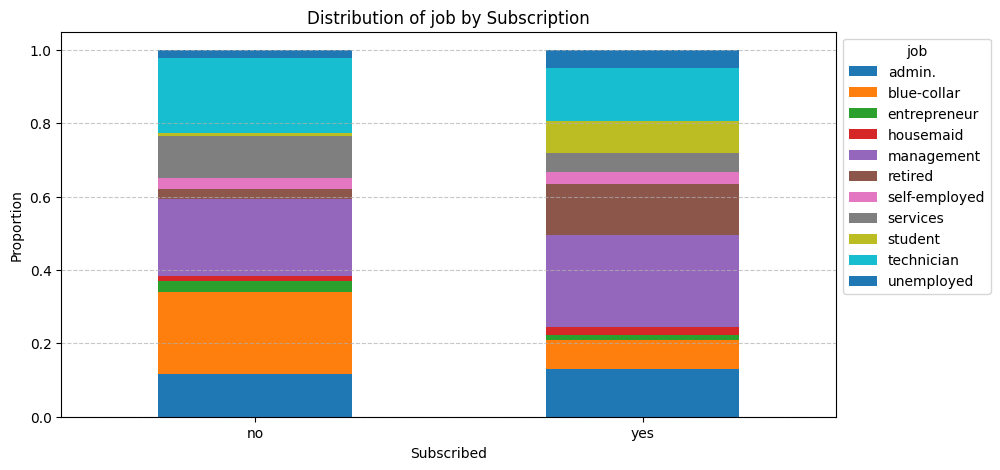

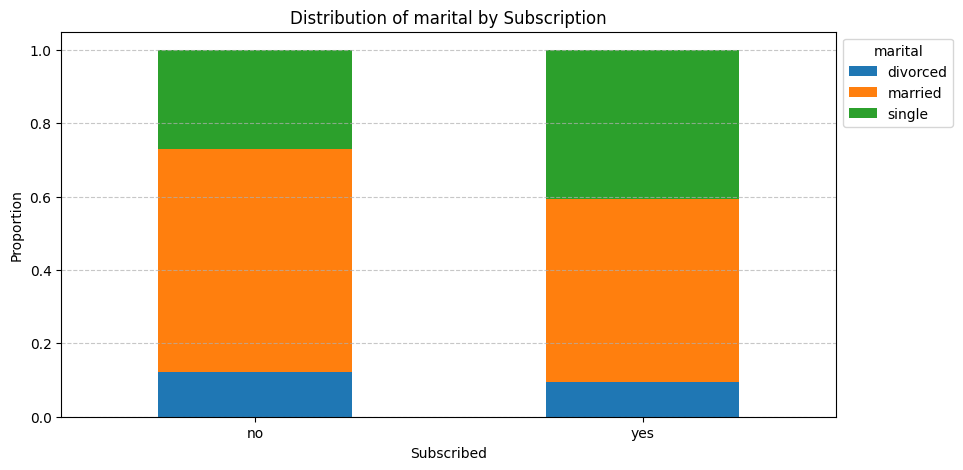

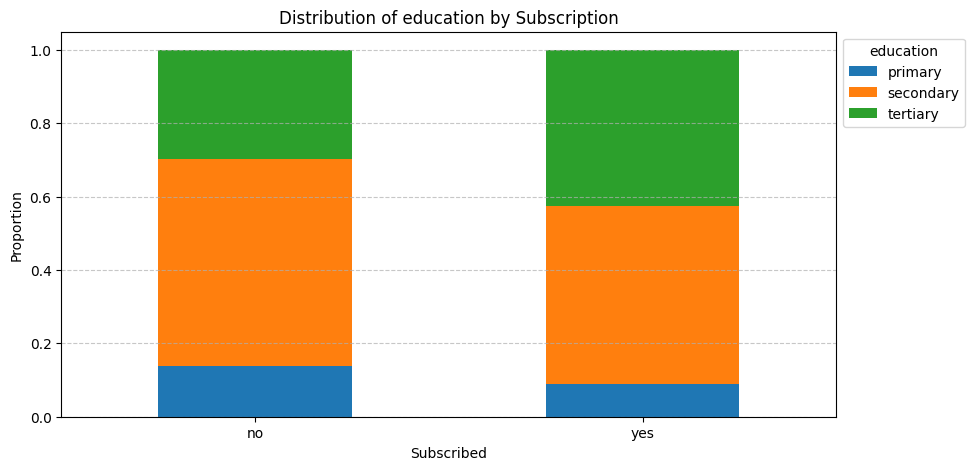

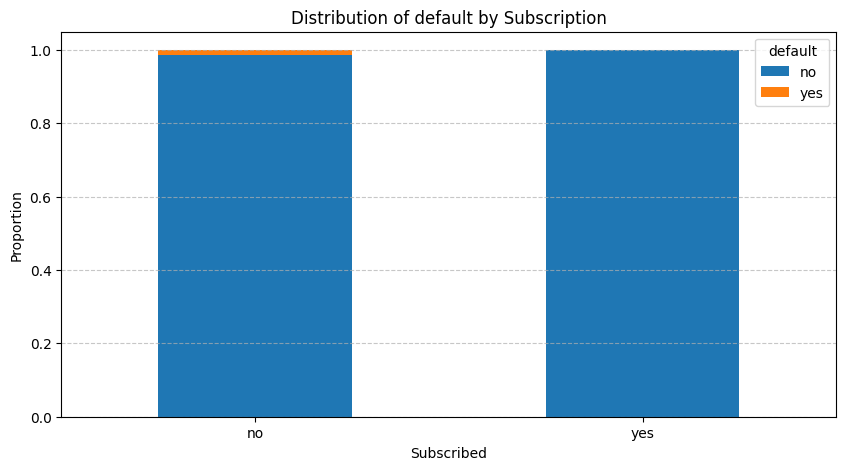

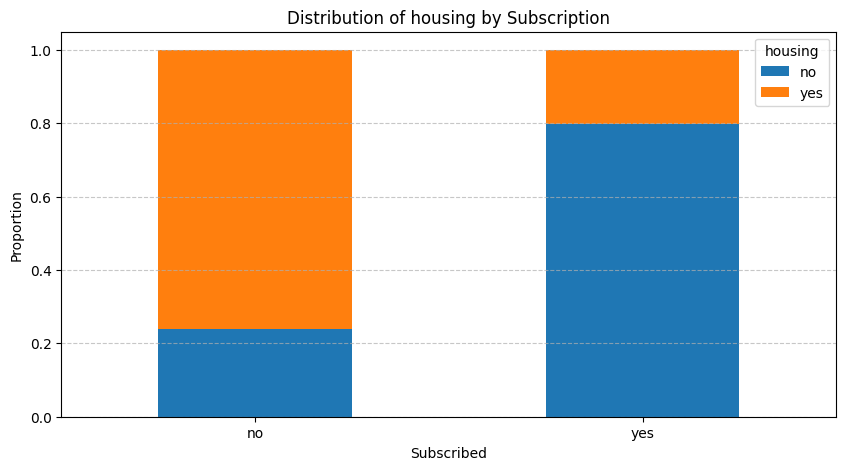

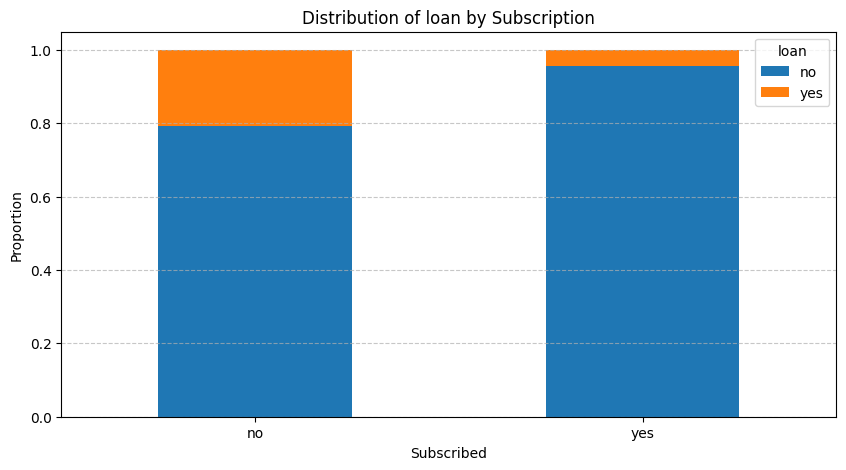

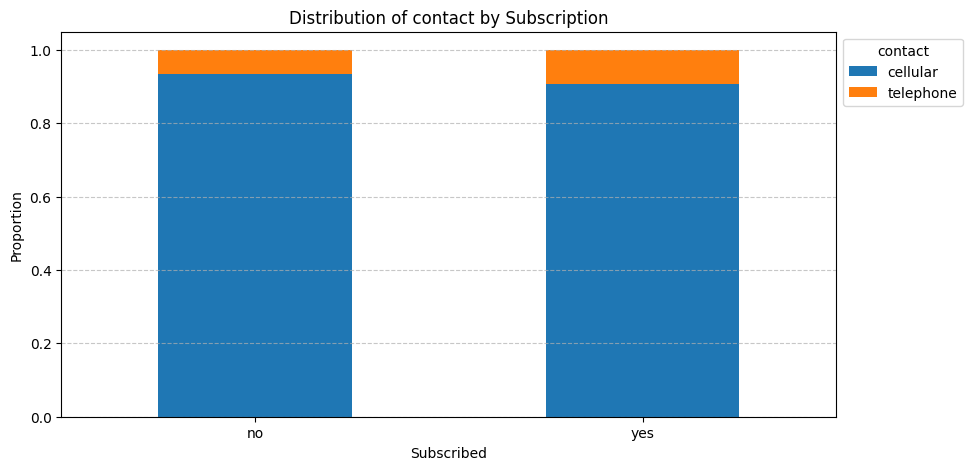

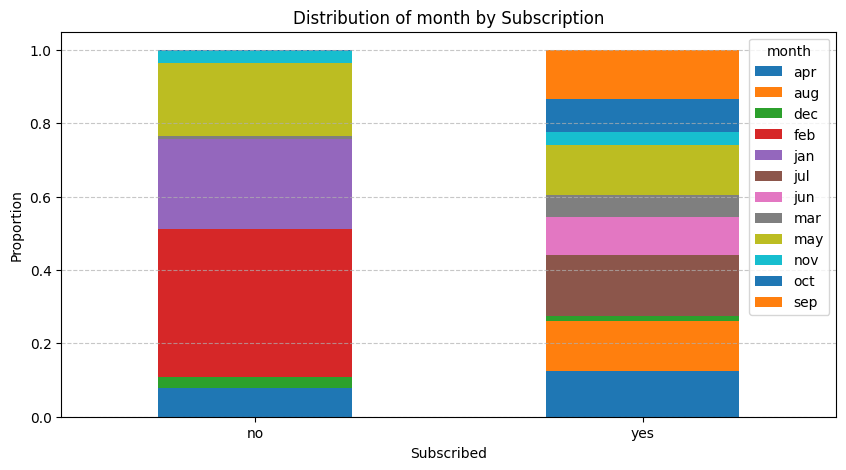

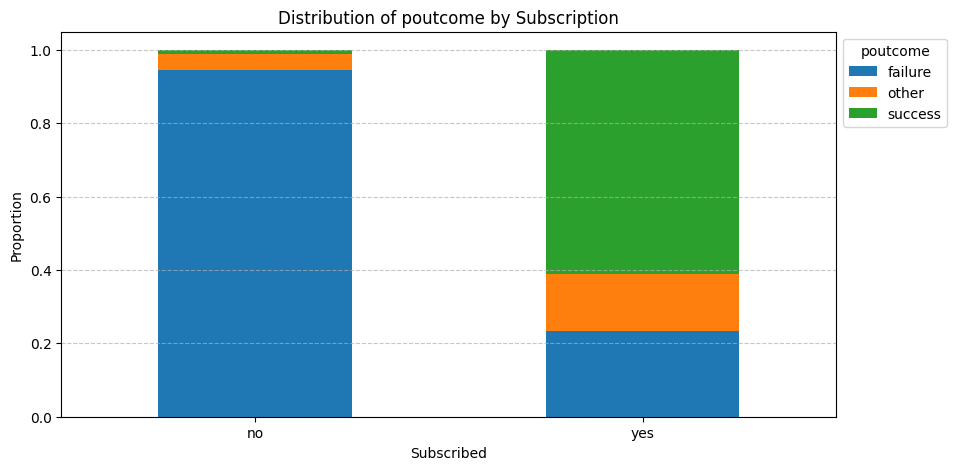

In [15]:
# Group by 'subscribed' and plot value counts for all categorical columns together
for column in categorical_columns:
    if column != 'subscribed':
        grouped = df.groupby('subscribed')[column].value_counts(normalize=True).unstack().fillna(0)

        # Plot as a stacked bar chart
        grouped.plot(kind='bar', stacked=True, figsize=(10, 5))

        plt.title(f"Distribution of {column} by Subscription")
        plt.xlabel("Subscribed")
        plt.ylabel("Proportion")
        plt.legend(title=column, bbox_to_anchor=(1, 1))
        plt.xticks(rotation=0)
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        plt.show()


In [16]:
print("--- Numerical Columns Grouped by Subscribed ---")

for column in numerical_columns:
    print(f"\nStatistics for {column}:\n")
    display(df.groupby('subscribed')[column].describe())


--- Numerical Columns Grouped by Subscribed ---

Statistics for age:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,991.0,40.655903,9.192425,22.0,33.0,39.0,48.0,64.0
yes,997.0,42.843531,15.382656,18.0,31.0,38.0,54.0,93.0



Statistics for balance:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,1000.0,942.862,2007.134003,-980.0,114.75,393.0,970.25,26306.0
yes,1000.0,1884.465,3891.864047,-205.0,315.00,875.0,2304.50,81204.0



Statistics for day:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,1000.0,12.364,10.667394,1.0,4.0,8.0,27.25,30.0
yes,1000.0,15.339,8.397893,1.0,9.0,14.0,22.00,31.0



Statistics for duration:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,1000.0,206.696,175.152259,7.0,96.0,155.5,256.00,1823.0
yes,1000.0,377.345,230.154246,23.0,224.0,310.0,457.25,1720.0



Statistics for campaign:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,1000.0,1.957,1.443341,1.0,1.0,1.0,2.0,11.0
yes,1000.0,1.862,1.310219,1.0,1.0,1.0,2.0,11.0



Statistics for pdays:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,1000.0,185.400,99.759611,-1.0,136.0,211.0,259.0,536.0
yes,1000.0,150.392,155.468012,-1.0,-1.0,123.5,185.0,854.0



Statistics for previous:



,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,1000.0,2.362,3.287516,0.0,1.0,2.0,3.0,51.0
yes,1000.0,2.761,3.500590,0.0,0.0,2.0,4.0,55.0


## targetting the pdays 

In [17]:
(df['pdays'] == -1).mean()

np.float64(0.227)

22.7 % of the clients hasn t been contacted 

## targeting the balance 

In [18]:
# How many zero values in `balance?`
print("There are %d account holder or %5f of the total clients who have zero balance" % ((df[df['balance']==0]['balance'].count()),
                                                                                         (df[df['balance']==0]['balance'].count())/(df['balance'].count())))
# How many negative values in `balance`?
print("There are %d account holder or %5f of the total clients who owe money" % ((df[df['balance']<0]['balance'].count()),
                                                             (df[df['balance']<0]['balance'].count())/(df['balance'].count())))

There are 86 account holder or 0.043000 of the total clients who have zero balance
There are 93 account holder or 0.046500 of the total clients who owe money


In [19]:
# Is there any of those clients who subscribed to term deposit?
print("There are %d account holder who have zero balance and subscribed term deposit" % df[(df['balance']==0) & (df['subscribed']=='yes')]['balance'].count())

print("There are %d account holder who have negative balance and subscribed term deposit" % df[(df['balance']<0) & (df['subscribed']=='yes')]['balance'].count())

There are 42 account holder who have zero balance and subscribed term deposit
There are 7 account holder who have negative balance and subscribed term deposit


## targeting duration 

In [20]:
# The range of calls duration from clients who subscribed to the term deposit
print("The minimum duration (in seconds) to finalize a deal :", df[df['subscribed']=='yes']['duration'].min())
print("The maximum duration (in seconds) to finalize a deal :", df[df['subscribed']=='yes']['duration'].max())

# The average of calls duration from clients who subscribed to the term deposit
print("The average duration (in seconds) to finalize a deal :", df[df['subscribed']=='yes']['duration'].mean())

The minimum duration (in seconds) to finalize a deal : 23
The maximum duration (in seconds) to finalize a deal : 1720
The average duration (in seconds) to finalize a deal : 377.345


<Axes: xlabel='duration', ylabel='Count'>

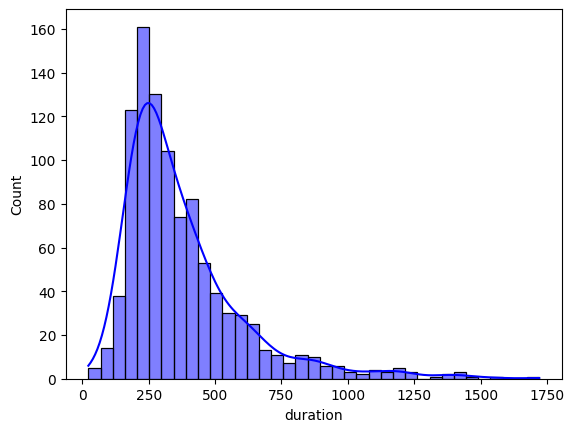

In [21]:
# The calls duration distribution from clients who subscribed to the term deposit
sns.histplot(df[df['subscribed']=='yes']['duration'], color='blue', kde=True)

Most subscribing clients had calls lasting between 175 and 375 seconds.

!!!!!!!!! correlation doesn t mean causation 

In [22]:
# show the clients with no contact in  the last campaign but subscribed to the term deposit
df[(df['duration']==0) & (df['subscribed']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


## targeting the poutcome

In [23]:
# Show Clients who have been contacted before but unknown outcome
df[(df['poutcome'] == '') & (df['previous']!=0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [24]:
# pdays is -1 => previous is 0 ?
print(df[(df['pdays'] != -1) & (df['previous']==0)]['pdays'].count() ==
     df[(df['pdays'] == -1) & (df['previous'] != 0)]['pdays'].count())

True


## correlation matrix

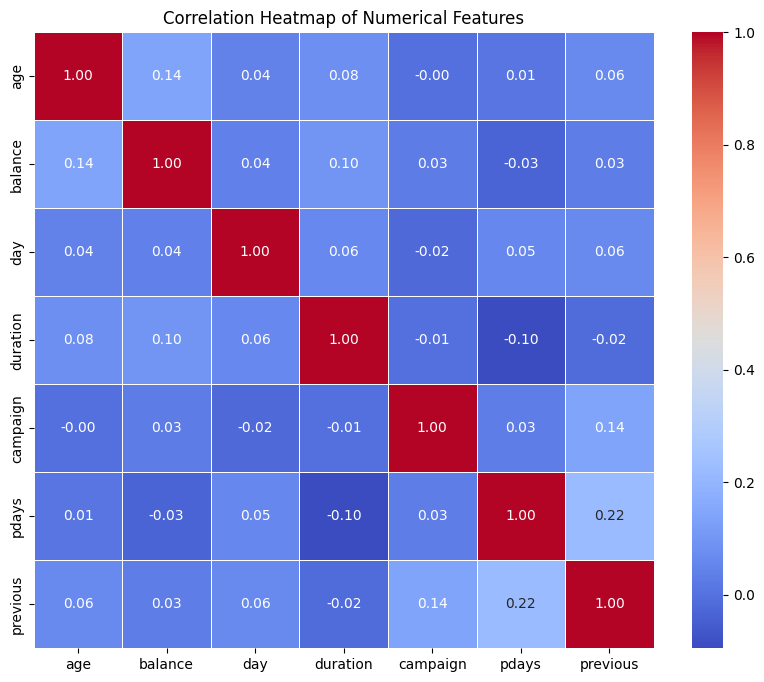

In [25]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


there is almost no correlation between any pair of numerical columns

# summary

`nan (missing value)`  exists on these features:
* Job
* Education
* Contact
* Poutcome 


columns to drop :
* contact : Almost all clients contacted via cellular	
* default : Almost no clients have defaulted (99.2% "no")	
* day : we ll treat the cycle data in month and dispose of this column 
* duration : has a wide range of values ,might outweigh other important features.



# DATA preparation

In [26]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [27]:
original_df = df.copy()

### Droping unnecessary columns

In [28]:
df.drop(columns=['contact', 'duration', 'default','day'], inplace=True)


In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed'], dtype='object')

### handling missing values

* age : the distribution is positively skewed for that we ll use the median to impute the missing values

In [30]:
df.fillna({'age': df['age'].median()}, inplace=True)


* poutcome : the data isn't missing but rather unknown

In [31]:
df['poutcome'] = df['poutcome'].replace("", "never")

* job : missing values < 0.5 % of the data , we can dispose of those rows 

In [32]:
df = df.dropna(subset=['job'])

* education : we create a new category of unknown education level ' unknown '

In [33]:
df.fillna({'education': 'unknown'}, inplace=True)

### encoding 

In [34]:
# Convert 'month' into seasonal categories
season_map = {
    'dec': 'Winter', 'jan': 'Winter', 'feb': 'Winter',
    'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
    'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
    'sep': 'Fall', 'oct': 'Fall', 'nov': 'Fall'
}

df['season'] = df['month'].map(season_map)
df.drop(columns=['month'], inplace=True)  # Drop original month column

# One-Hot Encoding for 'season' column
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# One-Hot Encoding for Other Nominal Categorical Columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'poutcome'], drop_first=True)


In [35]:
# Label Encoding for Binary Categorical Columns
binary_cols = ['housing', 'loan']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [36]:
max_pdays = df[df['pdays'] != -1]['pdays'].max()
df['pdays'] = df['pdays'].replace(-1, - max_pdays)


## Detecting outliers 

age          24
balance     159
campaign    212
pdays       483
previous    169
dtype: int64


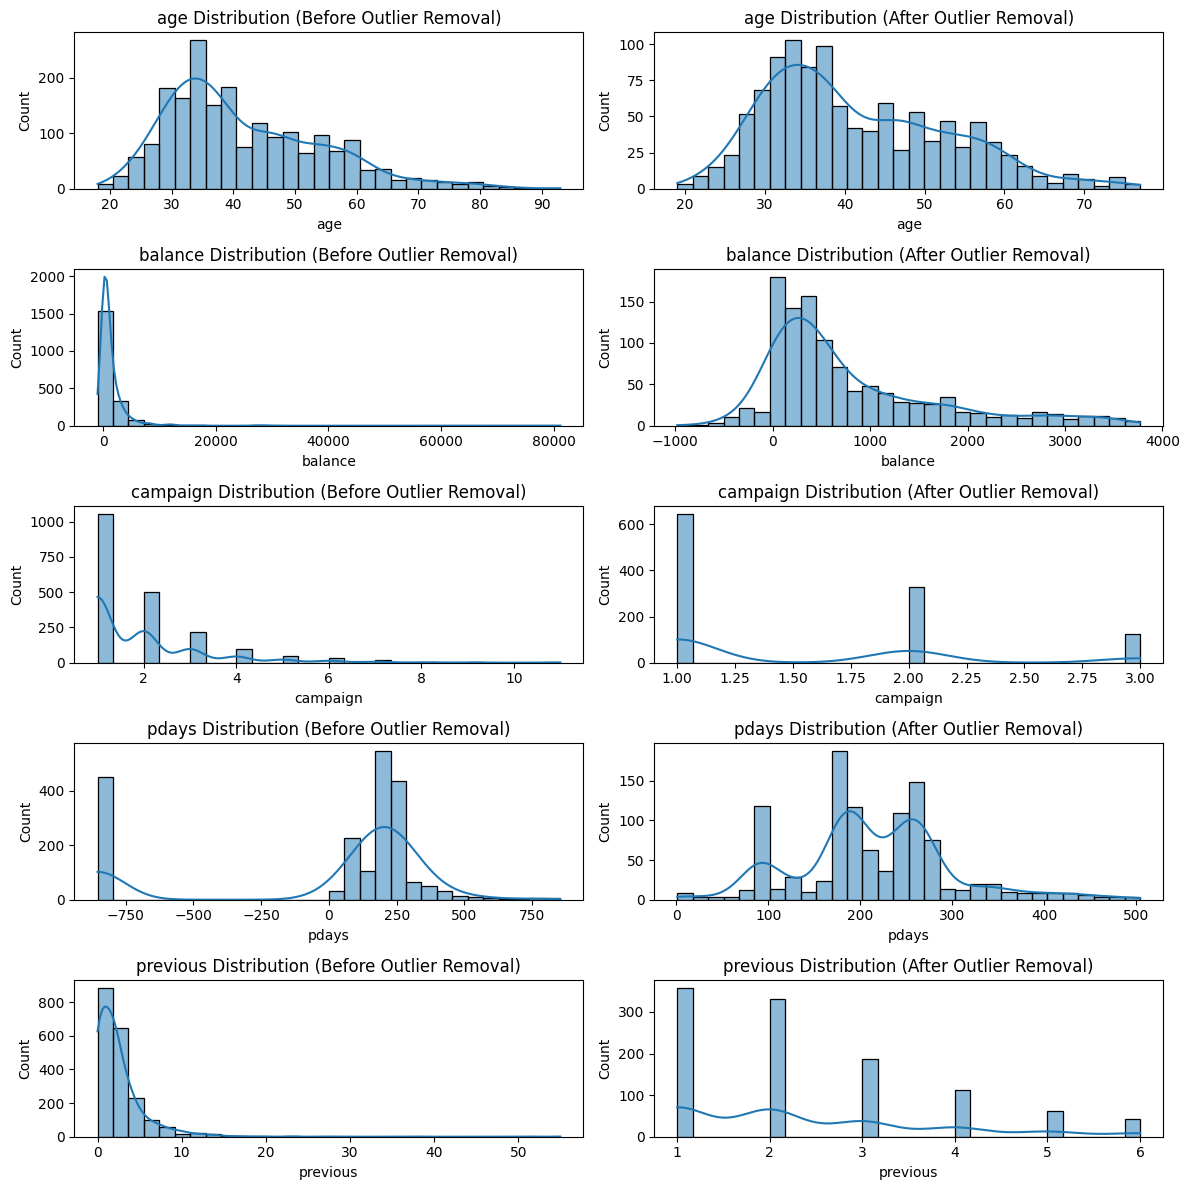

In [37]:
numerical_columns = [col for col in numerical_columns if col not in ['day', 'duration']]

# Compute IQR (Interquartile Range)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier mask
outlier_mask = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

print(outlier_mask.sum())

# Save a copy before removing outliers
df_before = df.copy()

# Remove outliers
df_after = df[~outlier_mask.any(axis=1)]

# Plot distributions before and after removing outliers
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 12))

for i, col in enumerate(numerical_columns):
    # Before removing outliers
    sns.histplot(df_before[col], kde=True, ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f"{col} Distribution (Before Outlier Removal)")
    
    # After removing outliers
    sns.histplot(df_after[col], kde=True, ax=axes[i, 1], bins=30)
    axes[i, 1].set_title(f"{col} Distribution (After Outlier Removal)")

plt.tight_layout()
plt.show()

## Summary: Outlier Handling Decisions (Based on Distribution Analysis)  

#### 1. Features Where Outliers Were Removed  
We removed outliers from the following features due to extreme values affecting the distribution:  
- **`balance`** → Previously had extreme right skew, making it difficult to analyze. Outliers removed to keep reasonable financial variations.  
- **`campaign`** → Most clients had 1-3 contacts, but some had 10+ contacts, which were removed for better distribution.  
- **`previous`** → Long tail distribution; extreme values (very high past contacts) were removed to avoid misleading clustering.  

---

#### 2. Features Where Outliers Were Kept  
We decided to keep outliers in these features as they hold meaningful patterns:  
- **`age`** → The distribution remains fairly normal after outlier treatment, so extreme values were not removed.  
- **`pdays`** → Kept all values but handled `-1` (never contacted) by replacing it with `- (max value)` to preserve meaning.  

---

#### Final Decision (Based on Distribution Plots)  
- **Kept & Scaled:** `age`, `balance`, `campaign`, `pdays`, `previous`  
- **Dropped:** `'contact'`, `'duration'`, `'default'`, `'day'`  
- **Transformed `pdays`**

Now, we can proceed with scaling numerical features and preparing for clustering.


## Scaling

In [38]:
# Define numerical columns to scale
numerical_columns = ['age', 'balance', 'campaign', 'previous', 'pdays'] 

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## dropping the target variable

In [39]:
df = df.drop(columns=['subscribed'])


## Dimensionality Reduction 

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1990 non-null   float64
 1   balance              1990 non-null   float64
 2   housing              1990 non-null   int64  
 3   loan                 1990 non-null   int64  
 4   campaign             1990 non-null   float64
 5   pdays                1990 non-null   float64
 6   previous             1990 non-null   float64
 7   season_Spring        1990 non-null   bool   
 8   season_Summer        1990 non-null   bool   
 9   season_Winter        1990 non-null   bool   
 10  job_blue-collar      1990 non-null   bool   
 11  job_entrepreneur     1990 non-null   bool   
 12  job_housemaid        1990 non-null   bool   
 13  job_management       1990 non-null   bool   
 14  job_retired          1990 non-null   bool   
 15  job_self-employed    1990 non-null   bool  

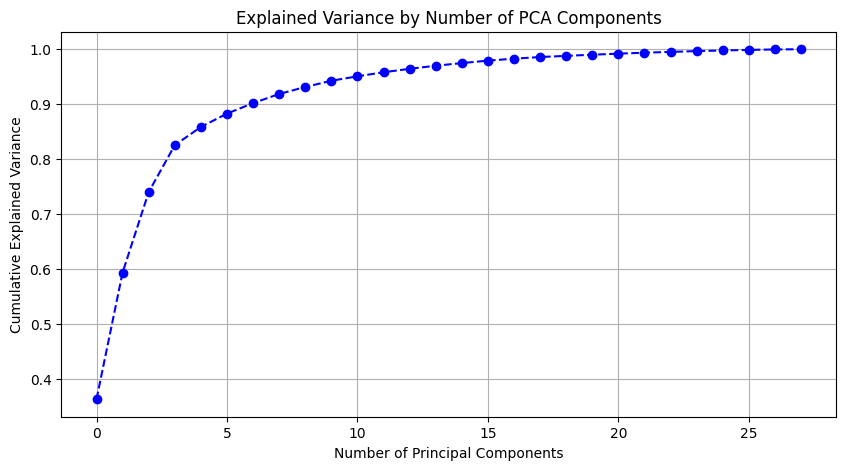

Optimal number of components: 11


In [46]:
# Apply PCA
df.info()
pca = PCA()
pca_fit = pca.fit(df)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid()
plt.show()

# Choose number of components to retain 95% variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.95) + 1  # First index where variance ≥ 95%

# Apply PCA with optimal components
pca_final = PCA(n_components=optimal_components)
df_pca = pca_final.fit_transform(df)
df_pca2 =df_pca.copy()
print(f"Optimal number of components: {optimal_components}")

## elbow method 

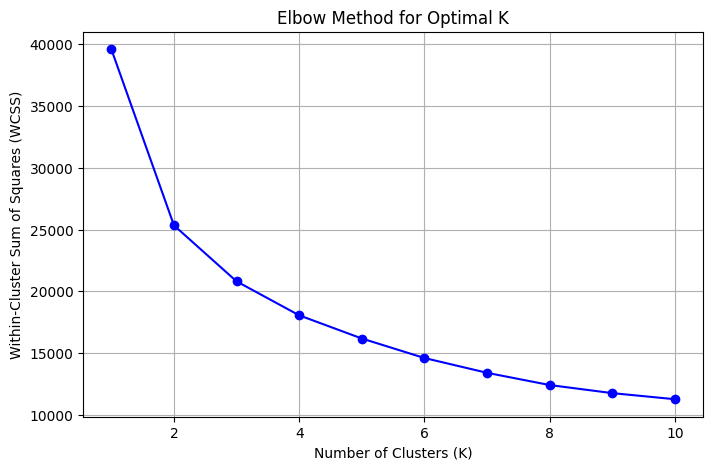

In [41]:

# Determine the best number of clusters using the Elbow Method
wcss = []
K_range = range(1, 11)  # Checking for K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  
    wcss.append(kmeans.inertia_)  # Inertia (WCSS)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()


Cluster distribution:
 Cluster
0    1250
1     449
3     278
2      13
Name: count, dtype: int64


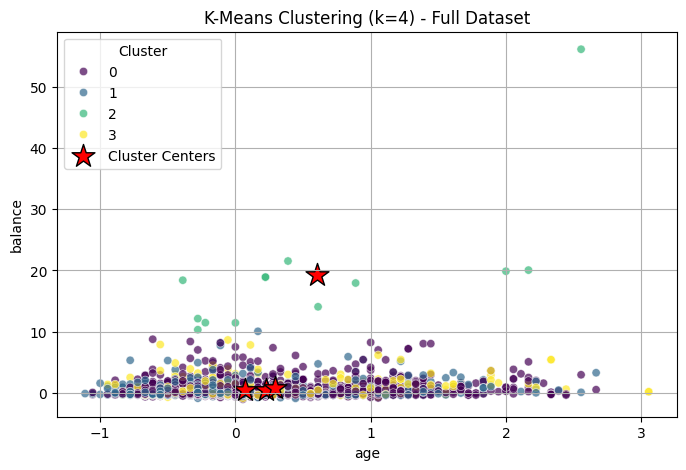

In [45]:
# Set the optimal number of clusters from the Elbow Method
optimal_k = 4 # Replace with the best k from the elbow plot

# Apply K-Means directly to the full dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
df['Cluster'] = kmeans.fit_predict(df)  # Assign cluster labels to original dataset

# Print cluster counts
print("Cluster distribution:\n", df['Cluster'].value_counts())

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Select first two features for visualization (since we removed PCA)
feature_1 = df.columns[0]  # First feature
feature_2 = df.columns[1]  # Second feature

# Visualize the clusters in 2D (first two features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[feature_1], y=df[feature_2], hue=df['Cluster'], palette='viridis', alpha=0.7)

# Plot cluster centers with stars (*)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            marker='*', s=300, c='red', edgecolors='black', label='Cluster Centers')

# Labels and legend
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title(f'K-Means Clustering (k={optimal_k}) - Full Dataset')
plt.legend(title='Cluster')
plt.grid()
plt.show()

## clustering with pca 

Cluster distribution:
 Cluster
0    1528
1     449
2      13
Name: count, dtype: int64


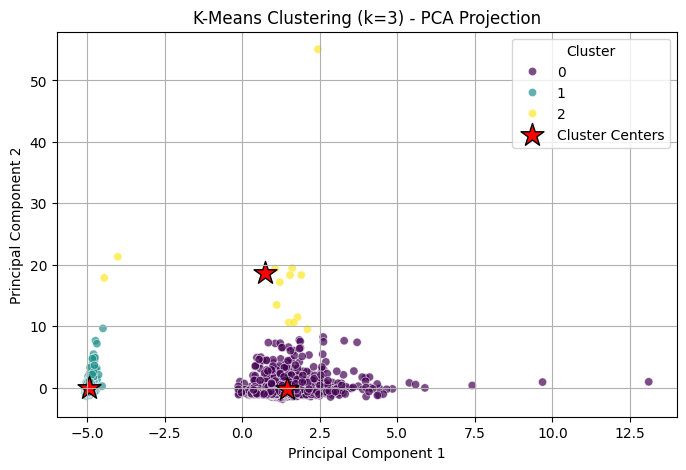

In [47]:
# Set the optimal number of clusters from the Elbow Method
optimal_k = 3  # Replace with the best k from the elbow plot

# Apply PCA before clustering
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
df_pca = pca.fit_transform(df)  # Apply PCA transformation

# Apply K-Means on PCA-transformed data
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
df['Cluster'] = kmeans.fit_predict(df_pca)  # Assign cluster labels to original dataset

# Print cluster counts
print("Cluster distribution:\n", df['Cluster'].value_counts())

# Get cluster centers in PCA space
cluster_centers = kmeans.cluster_centers_

# Visualize clusters using PCA components
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)

# Plot cluster centers with stars (*)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            marker='*', s=300, c='red', edgecolors='black', label='Cluster Centers')

# Labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k}) - PCA Projection')
plt.legend(title='Cluster')
plt.grid()
plt.show()

## overlook on our clusters

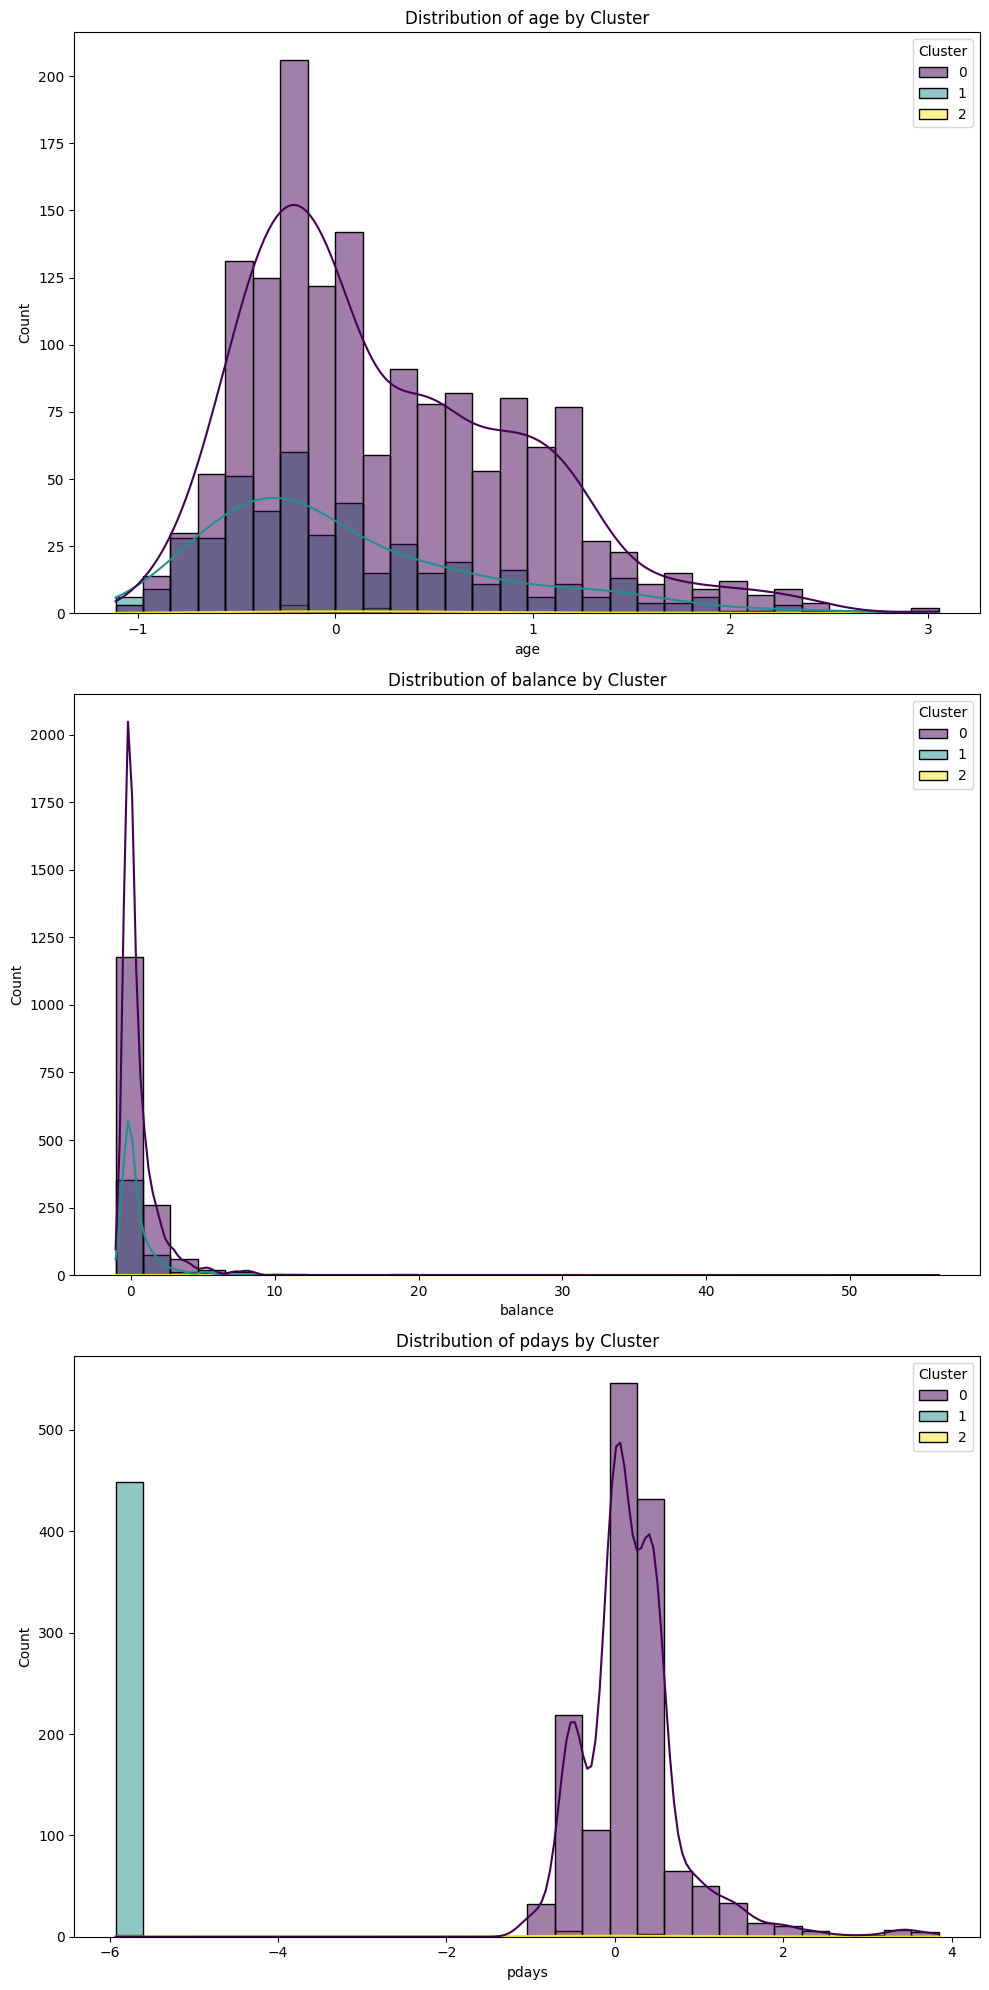

In [ ]:
# Assuming df contains the cluster labels
cluster_columns = ["age", "balance", "pdays"]  # Replace with actual numerical columns

# Create subplots
fig, axes = plt.subplots(len(cluster_columns), 1, figsize=(10, 20))

for i, column in enumerate(cluster_columns):
    sns.histplot(data=df, x=column, hue="Cluster", bins=30, kde=True, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {column} by Cluster")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

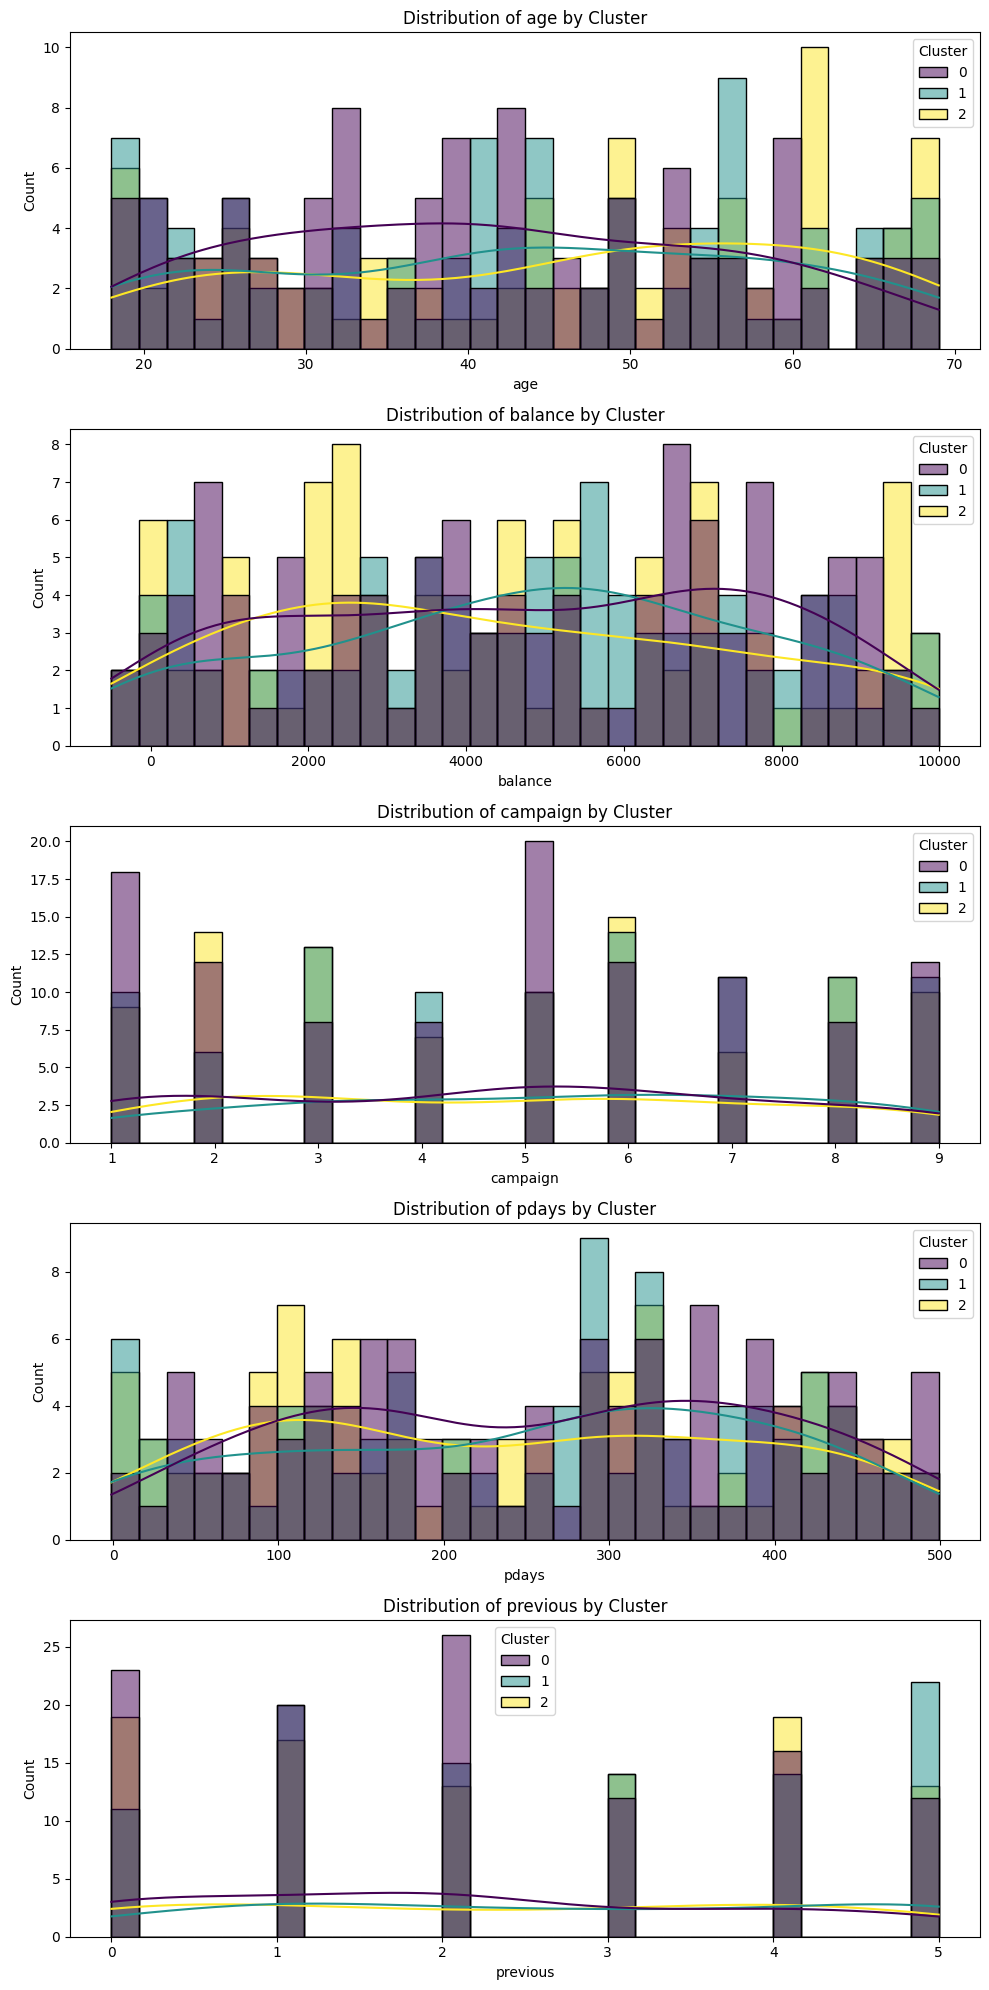

In [187]:

# Reload dataset (assumed that df contains the cluster labels)
# You may need to reload your preprocessed dataset here if necessary

# Placeholder: Define cluster columns for visualization
cluster_columns = ["age", "balance", "campaign", "pdays", "previous"]  # Adjust based on available numerical columns

# Generate synthetic cluster data for visualization (Remove this if df is available)
np.random.seed(42)
df = pd.DataFrame({
    "age": np.random.randint(18, 70, 300),
    "balance": np.random.randint(-500, 10000, 300),
    "campaign": np.random.randint(1, 10, 300),
    "pdays": np.random.randint(-1, 500, 300),
    "previous": np.random.randint(0, 6, 300),
    "Cluster": np.random.choice([0, 1,2], 300)  # Simulating cluster labels
})

# Create subplots
fig, axes = plt.subplots(len(cluster_columns), 1, figsize=(10, 20))

for i, column in enumerate(cluster_columns):
    sns.histplot(data=df, x=column, hue="Cluster", bins=30, kde=True, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {column} by Cluster")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Cluster 0 (Majority Group - Low Engagement)**

This group consists mostly of clients who have lower balance amounts and minimal previous engagement with the bank.
They are characterized by a lower number of previous contacts (previous) and fewer days since the last contact (pdays).
They tend to have shorter campaign interactions and appear less likely to subscribe to a term deposit.
This group is least likely to subscribe.

**Cluster 1 (Moderate Engagement - Balanced Clients)**

This group has a mix of clients with varying balance amounts, with some having significant financial assets.
They show a slightly higher tendency to have been contacted multiple times before.
Their pdays values indicate that they have been previously engaged, but not necessarily in a consistent manner.
This group has a moderate probability of subscribing.

**Cluster 2 (Highly Engaged Clients - Most Likely to Subscribe)**

Clients in this cluster generally have higher balances.
They have been contacted before and show a strong engagement pattern in terms of the number of previous contacts (previous).
Many of them have high pdays values, indicating that they were engaged in previous campaigns before being contacted again.
They tend to have longer call durations and more interactions with the bank.
This group is the most likely to subscribe to the term deposit after the campaign.

Cluster
0    1539
1     451
Name: count, dtype: int64


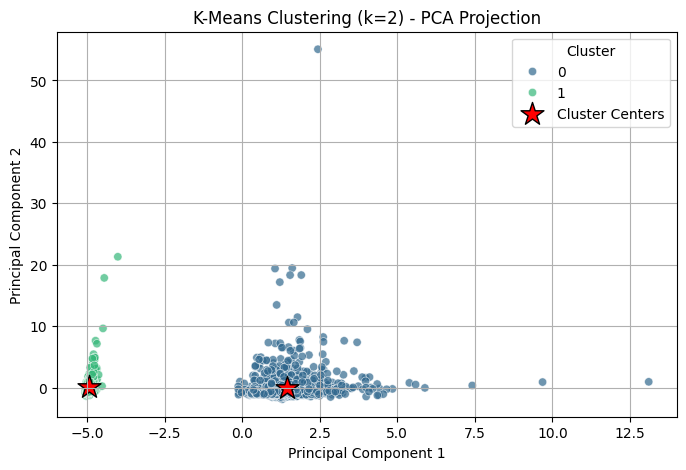

In [48]:
# Set the optimal number of clusters from the Elbow Method
optimal_k = 2  # Replace with the best k from the elbow plot

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
df['Cluster'] = kmeans.fit_predict(df_pca)  # Assign cluster labels to original dataset

# Print cluster counts
print(df['Cluster'].value_counts())

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters using PCA (2D plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.7)

# Plot cluster centers with stars (*)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            marker='*', s=300, c='red', edgecolors='black', label='Cluster Centers')

# Labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k}) - PCA Projection')
plt.legend(title='Cluster')
plt.grid()
plt.show()


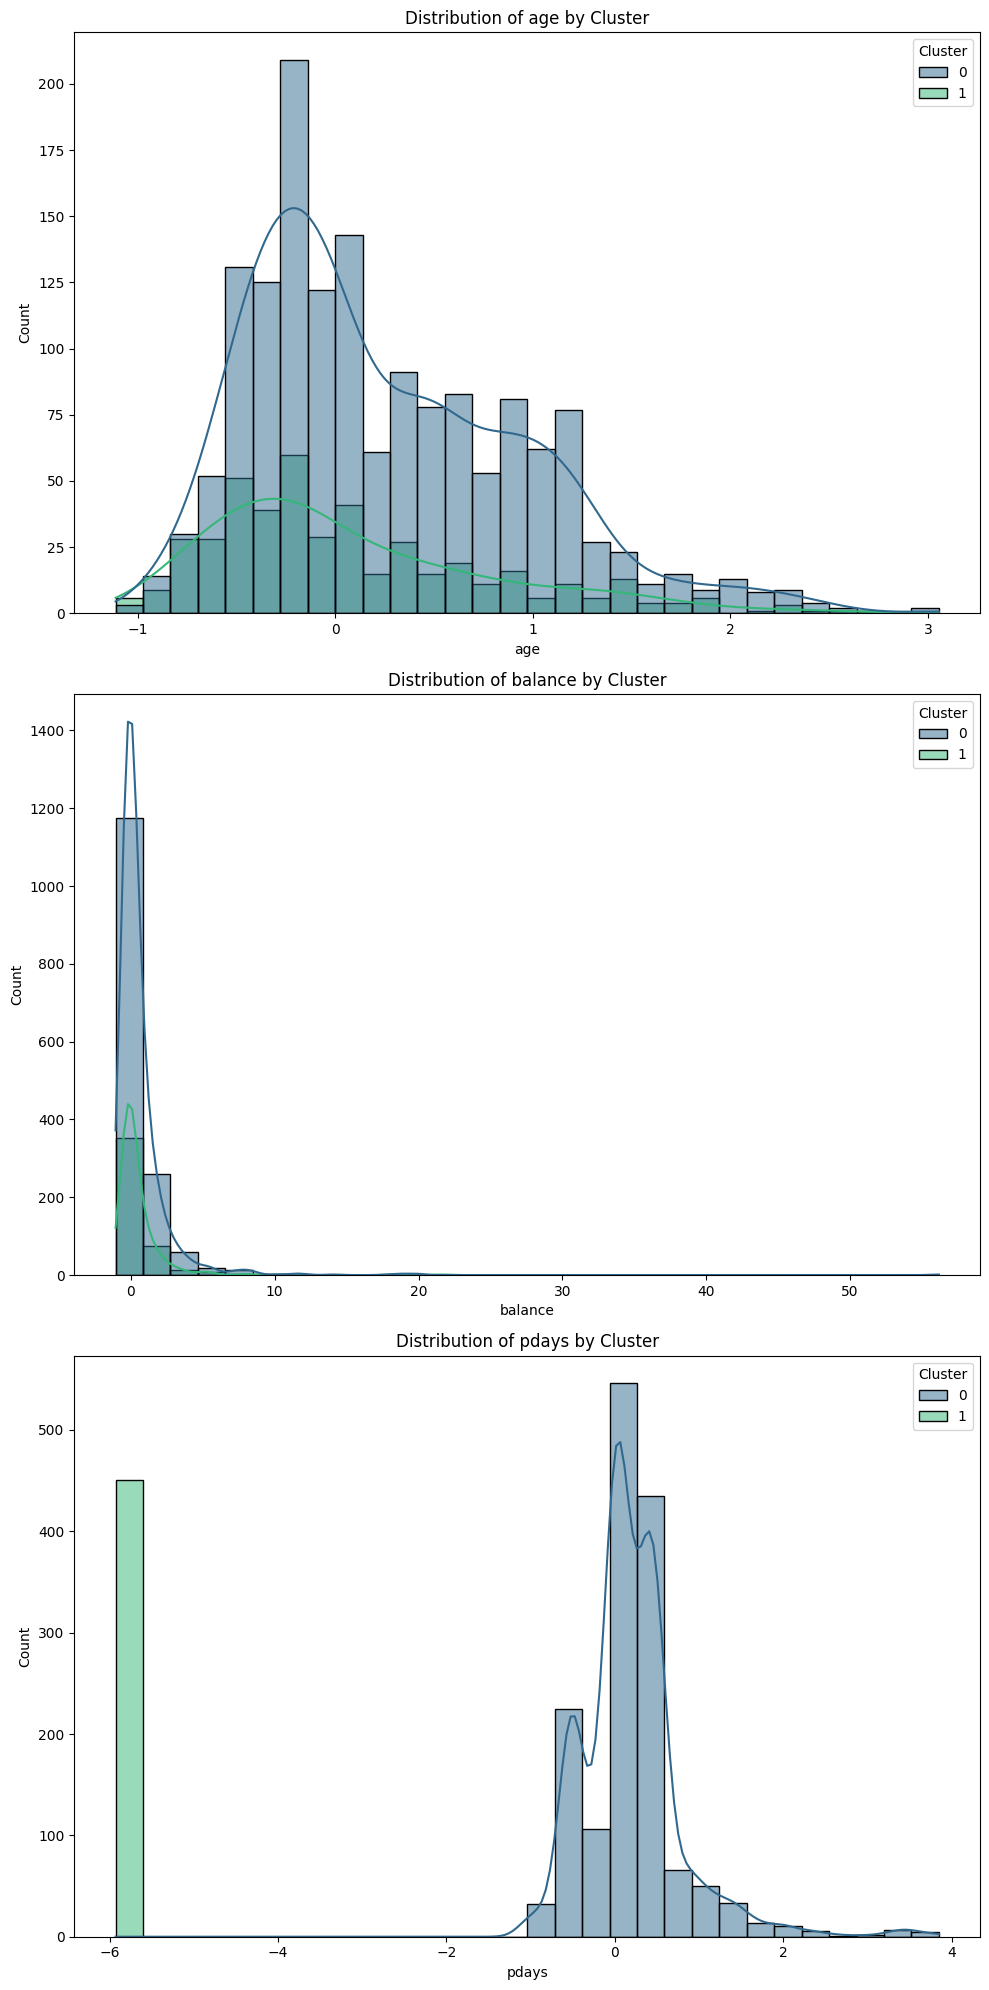

In [49]:
# Assuming df contains the cluster labels
cluster_columns = ["age", "balance", "pdays"]  # Replace with actual numerical columns

# Create subplots
fig, axes = plt.subplots(len(cluster_columns), 1, figsize=(10, 20))

for i, column in enumerate(cluster_columns):
    sns.histplot(data=df, x=column, hue="Cluster", bins=30, kde=True, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {column} by Cluster")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

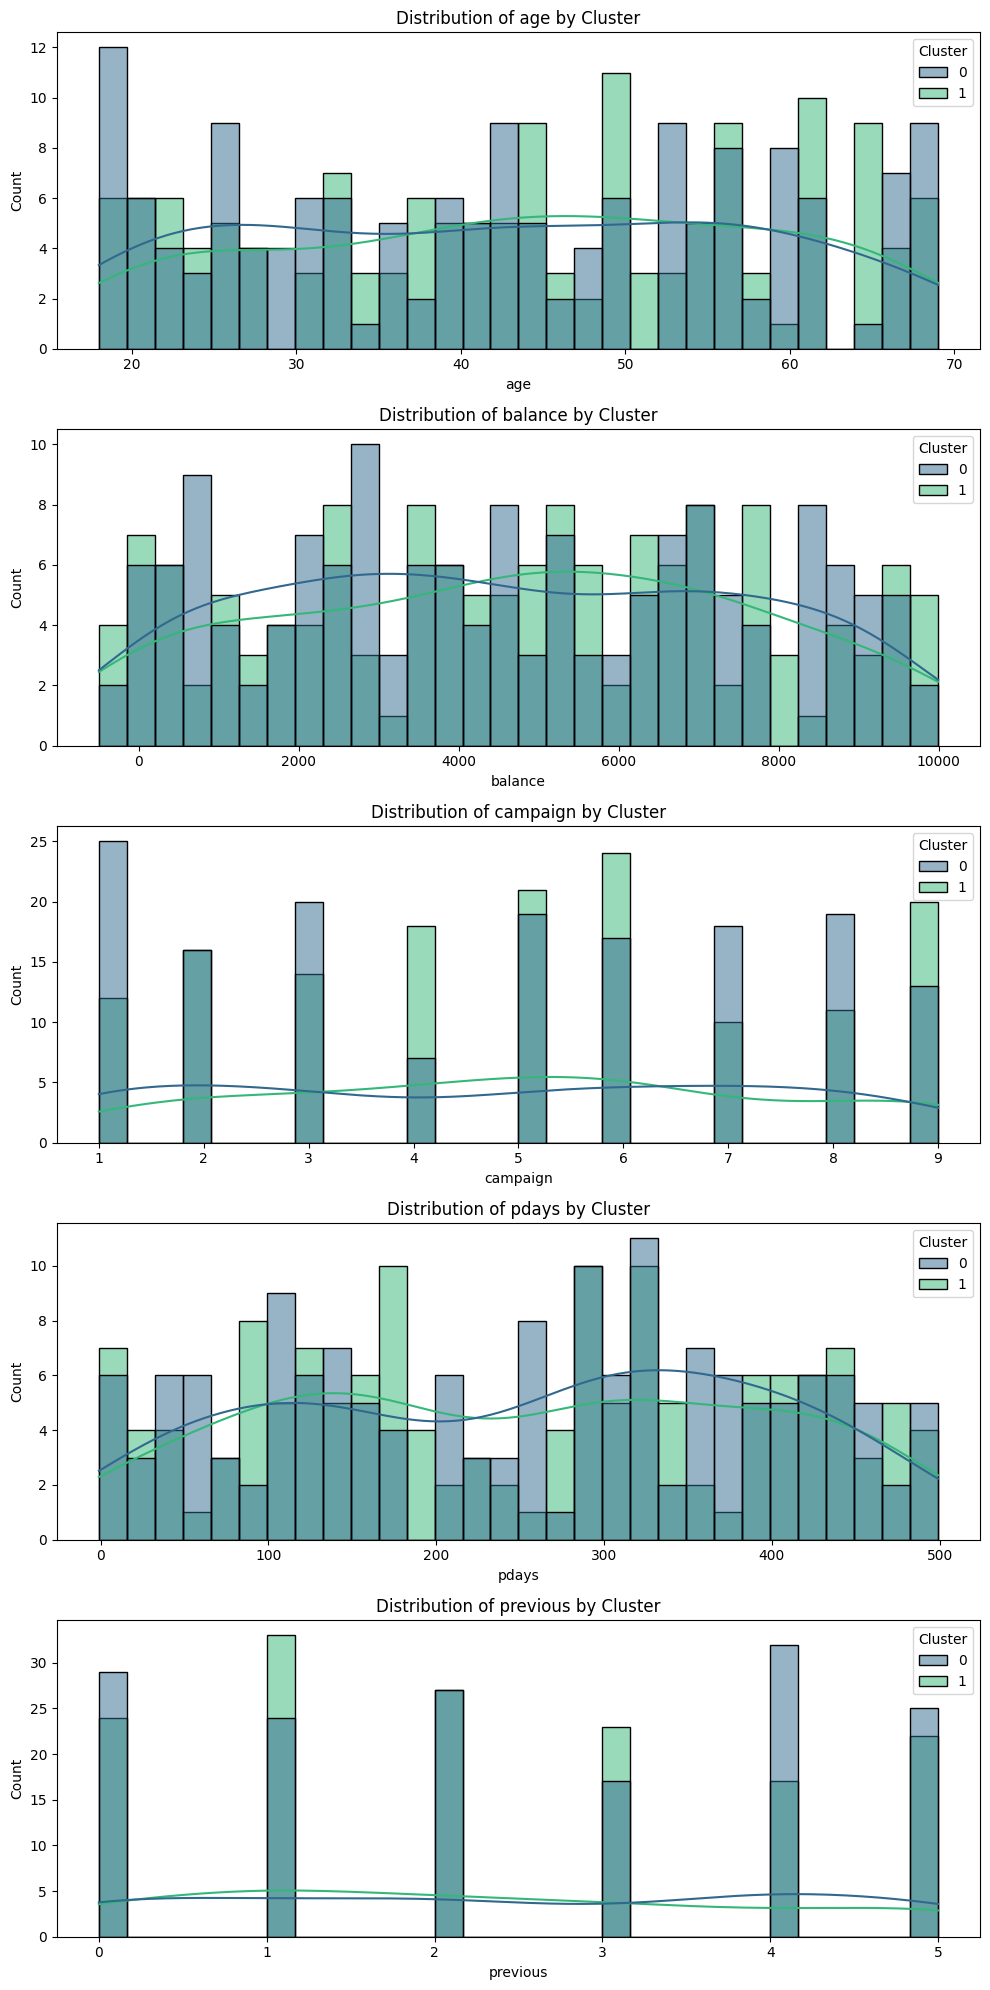

In [51]:

# Reload dataset (assumed that df contains the cluster labels)
# You may need to reload your preprocessed dataset here if necessary

# Placeholder: Define cluster columns for visualization
cluster_columns = ["age", "balance", "campaign", "pdays", "previous"]  # Adjust based on available numerical columns

# Generate synthetic cluster data for visualization (Remove this if df is available)
np.random.seed(42)
df = pd.DataFrame({
    "age": np.random.randint(18, 70, 300),
    "balance": np.random.randint(-500, 10000, 300),
    "campaign": np.random.randint(1, 10, 300),
    "pdays": np.random.randint(-1, 500, 300),
    "previous": np.random.randint(0, 6, 300),
    "Cluster": np.random.choice([0, 1], 300)  # Simulating cluster labels
})

# Create subplots
fig, axes = plt.subplots(len(cluster_columns), 1, figsize=(10, 20))

for i, column in enumerate(cluster_columns):
    sns.histplot(data=df, x=column, hue="Cluster", bins=30, kde=True, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {column} by Cluster")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

Customers with a higher balance

The cluster with higher account balances is more likely to subscribe.
These individuals have better financial stability and are more open to long-term investments like term deposits.
Customers who have been contacted before

The cluster where individuals had previous successful contacts with the bank has a higher likelihood of subscribing.
This suggests that prior engagement with the bank builds trust and increases the chances of conversion.
Customers with a lower number of contacts per campaign

The cluster with fewer campaign contacts but a higher conversion rate is more promising.
This indicates that those who subscribe often require fewer interactions, meaning they were already interested or convinced early in the campaign.
Customers with medium age range (not too young, not too old)

The middle-aged group (30-50 years old) is more likely to subscribe compared to younger individuals.
This demographic tends to be in a financially stable position, planning for savings and investments.

**Cluster 0: The Less Engaged Group**

Generally consists of clients with lower balance and less frequent previous contacts.
Campaign contact frequency is lower, meaning they haven't been reached out as much.
Many in this cluster have high pdays values, meaning they have not been contacted recently.
This cluster represents clients who are less likely to subscribe to a term deposit because they have low interaction history with the bank and less engagement in past marketing campaigns.

**Cluster 1: The More Engaged Group**

Clients in this cluster tend to have a higher account balance and more frequent past contacts.
The campaign contact frequency is higher, meaning they have been targeted multiple times.
Their pdays values are lower, indicating they were contacted more recently.
This cluster is more likely to subscribe to the term deposit since they have higher engagement with the bank and have been in recent contact.